In [27]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [61]:
def find_peaks(data, height=0, distance=100):
    # Identify points where the slope changes from positive to negative (peaks)
    gradient = np.diff(data)
    peaks = (np.hstack((0,gradient)) > 0) & (np.hstack(( gradient,0)) < 0)

    # Filter by threshold
    peaks = peaks & (data > height)

    # Get indices of the peaks
    peak_indices = np.where(peaks)[0]


    if distance > 1:
        selected_peaks = []
        last_peak = -distance  # Ensure first peak is always selected
        for peak in peak_indices:
            if peak - last_peak >= distance:
                selected_peaks.append(peak)
                last_peak = peak
        peak_indices = np.array(selected_peaks)

    return peak_indices, None

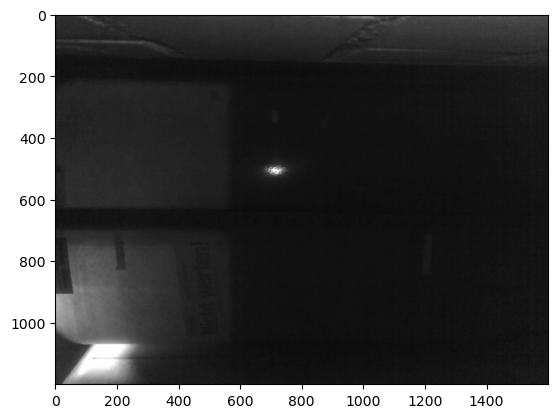

In [29]:
img = np.array(Image.open("/home/sheid/Nextcloud/Öltank/20241025040031.jpg"))[:, :, 0]
plt.imshow(img, cmap='gray')

In [60]:
grad = np.diff(edge_filtered[135:155])
(np.hstack((grad,0)) > 0) & (np.hstack((0,grad)) < 0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

(array([ 145,  247,  347,  602,  892,  994, 1135]), None)

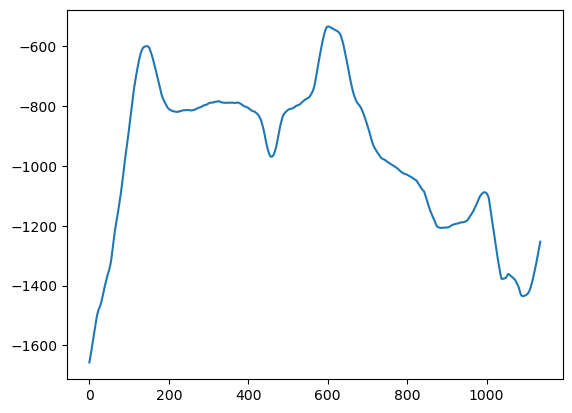

In [62]:
#from scipy.signal import find_peaks
levels = np.mean(img,axis=1)
s = 32
kernel = np.array([-1]*s+ [0]*(s+1))
edge_filtered = np.convolve(levels, kernel, mode='valid')
plt.plot(edge_filtered)
y= find_peaks(edge_filtered, height=-1800)[0][0] +s
y
find_peaks(edge_filtered, height=-1800)

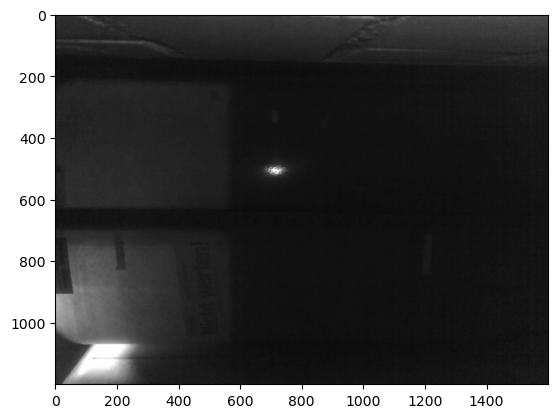

In [31]:
region = img
plt.imshow(region, cmap='gray')

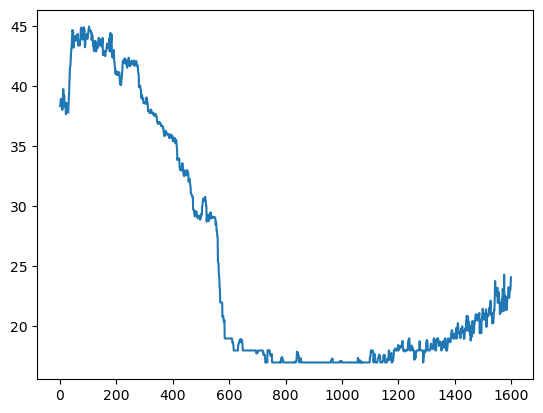

In [32]:
k25 = int(region.shape[0] * 0.45)
k75 = region.shape[0] - k25
data = np.partition(region, (k25, k75), axis=0)[k25:k75+1, :]

# Compute the mean across axis 0
levels = np.mean(data, axis=0)
plt.plot(levels)

np.int64(565)

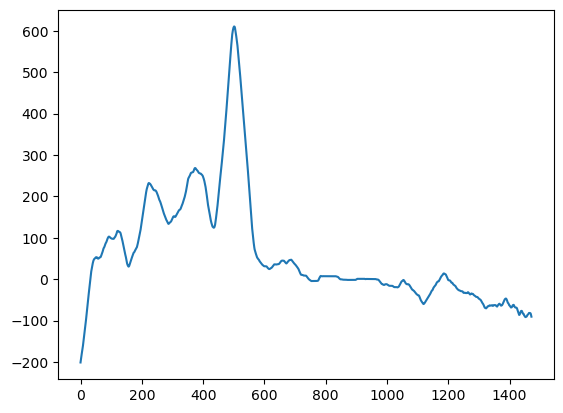

In [33]:
s = 64
kernel = np.array([-1]*s+ [0]+ [1]*s)
edge_filtered = np.convolve(levels, kernel, mode='valid')
plt.plot(edge_filtered)
x = np.argmax(edge_filtered) +s
x

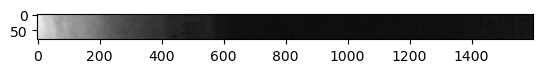

In [34]:
region = img[y+570:y+650]
plt.imshow(region, cmap='gray')

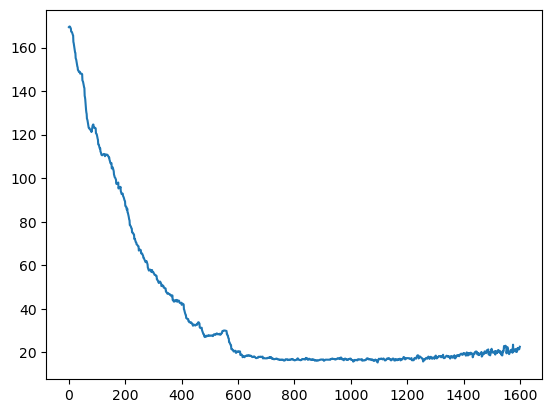

In [35]:
levels = np.mean(region,axis=0)
plt.plot(levels)

ValueError: not enough values to unpack (expected 2, got 0)

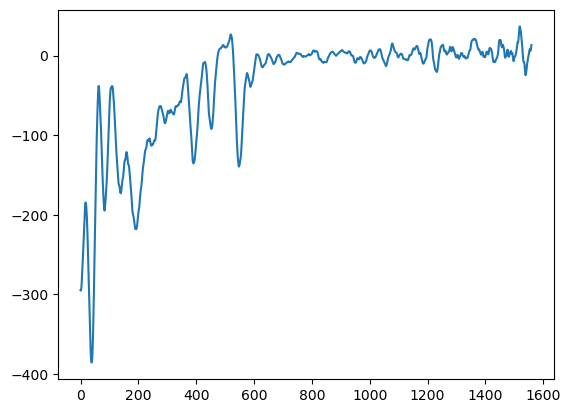

In [36]:
s = 20
kernel = np.array([1]*s+ [0]+ [-1]*s)
edge_filtered = np.convolve(levels, kernel, mode='valid')
plt.plot(edge_filtered)
up,low = find_peaks(np.hstack((np.zeros(100),edge_filtered[100:])), height=110)[0]
up+s,low +s

In [ ]:
l = (up-low) /800
((x-low)/l + 400)*3


np.float64(2710.8359133126937)